# <h1 style='color: darkblue; font-size: 30px;'>Data Science - KNN Application for Car Evaluation</h1>

<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid darkblue;'>

# <font color='darkblue' style='font-size: 20;'>About the dataset</font>

### <font color='darkblue' style='font-size: 20;'>Data</font>

The dataset consists of 1728 data points stored as rows with 7 features in columns. The model evaluates cars according to the following concept structure:

* **buying:** buying price, can be vhigh, high, med, low.
* **maint:** price of the maintenance, can be vhigh, high, med, low.
* **doors:** number of doors, can be 2, 3, 4, 5more.
* **persons:** capacity in terms of persons to carry, can be 2, 4, more.
* **lug_boot:** the size of luggage boot, can be small, med, big.
* **safety:** estimated safety of the car, can be low, med, high.
* **Class:** car rating, can be unacc, acc, good, vgood. 

<hr style = 'border: 1px solid darkblue;'>

# <font color='darkblue' style='font-size: 10;'>The project</font>

### <font color='darkblue' style='font-size: 20;'>Description:</font>
The main goal of the project is to study and develop a machine learning evaluate system using KNN (k-nearest neighbors algorithm).

https://archive.ics.uci.edu/ml/datasets/car+evaluation

<hr style = 'border: 1px solid darkblue;'>

# <font color='darkblue' style='font-size: 20;'>Preparation</font>
<hr style = 'border: 1px solid darkblue;'>

In [30]:
#Import the required libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
#Read the dataset
df = pd.read_csv('cars.csv')

In [32]:
#Visualizate the dataset
df.head()

,Buying,Maint,doors,persons,lug_boot,safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [33]:
#Verify the size of the dataset
df.shape

(1728, 7)

In [34]:
#Analyzsis of descriptive statistics
dataset_1.describe(include=['O'])

,Buying,Maint,doors,persons,lug_boot,safety,Class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,3,4,med,med,unacc
freq,432,432,432,576,576,576,1210


In [35]:
#Checking if that there are no non-null values in the data
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Buying    1728 non-null   object
 1   Maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   Class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### <font color='darkblue' style='font-size: 20;'>Pre-processing</font> 

In [36]:
#Label Encoder
le  = preprocessing.LabelEncoder()
df['Buying_1'] = le.fit_transform(dataset_1['Buying'])
df['Maint_1'] = le.fit_transform(dataset_1['Maint'])
df['doors_1'] = le.fit_transform(dataset_1['doors'])
df['persons_1'] = le.fit_transform(dataset_1['persons'])
df['lug_boot_1'] = le.fit_transform(dataset_1['lug_boot'])
df['safety_1'] = le.fit_transform(dataset_1['safety'])

In [37]:
df.head(2)

,Buying,Maint,doors,persons,lug_boot,safety,Class,Buying_1,Maint_1,doors_1,persons_1,lug_boot_1,safety_1
0,vhigh,vhigh,2,2,small,low,unacc,3,3,0,0,2,1
1,vhigh,vhigh,2,2,small,med,unacc,3,3,0,0,2,2


# <font color='darkblue' style='font-size: 20;'>Building the model</font>
<hr style = 'border: 1px solid darkblue;'>

### <font color='darkblue' style='font-size: 20;'>KNN</font> 

In [40]:
#Setting the value for dependent and independent variables
X = df.iloc[:,[7,8,9,10,11,12]]
Y = df.iloc[:,6]

In [42]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
SEED = 42
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=SEED)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
#Creating and training the KNN model
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

Here we have specified three parameters n_neighbors=5. This implies that we will take vore from 5 nearest neighbors for feature similarity.

Distance between the new point and the point in the dataset will be calculated using minkowski and p=2, so the distance is euclidean distance

In [51]:
#Prediction of test set
Y_pred= classifier.predict(X_test)
Y_pred

array(['unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'acc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'good', 'unacc', 'unacc', 'unacc', 'unacc', 'acc',
       'vgood', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'vgood', 'unacc', 'unacc', 'unacc', 'vgood', 'acc', 'unacc', 'acc',
       'vgood', 'acc', 'unacc', 'good', 'unacc', 'unacc', 'unacc', 'good',
       'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc'

In [45]:
#Metrics
from sklearn import metrics
print('Accuracy:', metrics.accuracy_score(Y_test, Y_pred))
print('F1-score:', metrics.f1_score(Y_test, Y_pred, average='weighted'))

0.8865740740740741
0.8789106519829497


In [46]:
#Testing different values for 'k
f1_score = []
for i in range(1,11):
    classifier = KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=2)
    classifier.fit(X_train, Y_train)
    Y_pred= classifier.predict(X_test)
    f1_score.append(metrics.f1_score(Y_test, Y_pred, average='weighted'))

In [47]:
f1_score

[0.7988772164426562,
 0.7971781080166004,
 0.8378460097098204,
 0.8476888504405553,
 0.8789106519829497,
 0.9050063831839461,
 0.9204624126236669,
 0.8928784213506437,
 0.8669101830845156,
 0.8635743756226605]

In [48]:
#Best combination
tmp = max(f1_score)
index = f1_score.index(tmp)+1
print(tmp, index)

0.9204624126236669 7


Text(0, 0.5, 'F1 Score')

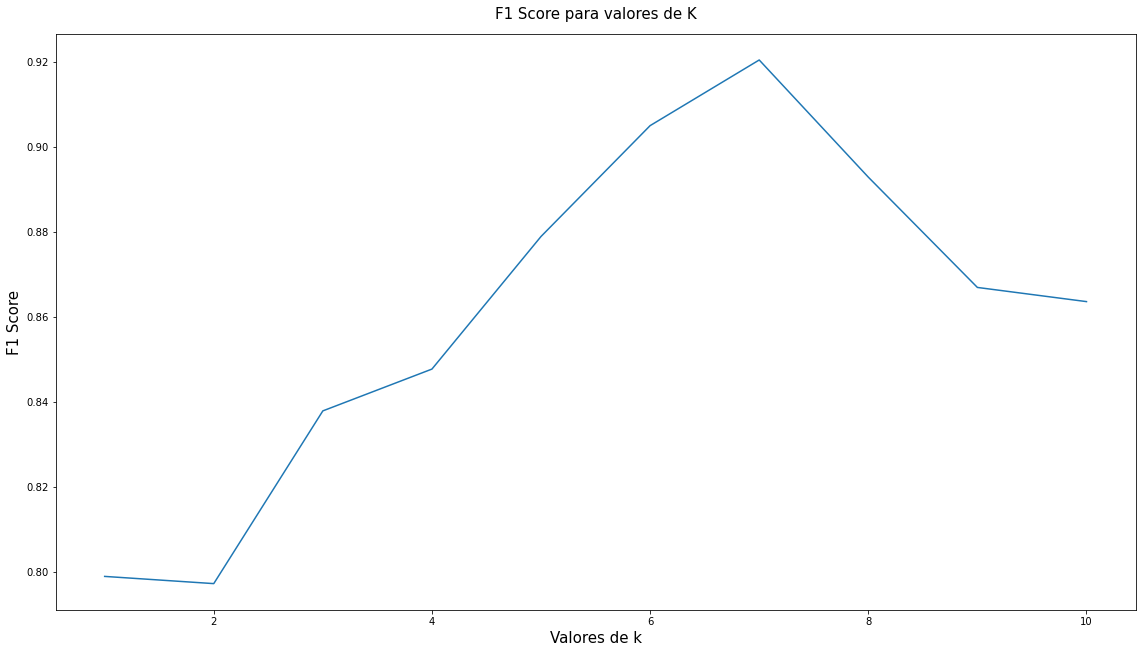

In [50]:
#Analysis of the relationship between f1-score and k
y = [1,2,3,4,5,6,7,8,9,10]

fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0,0,1,1])

eixo.plot(y, f1_score)

eixo.set_title('F1 Score for k values', fontsize=15, pad=15)
eixo.set_xlabel('k values', fontsize=15)
eixo.set_ylabel('F1 Score', fontsize=15)
plt.show()

# <font color='darkblue' style='font-size: 20;'>Final Model</font>
<hr style = 'border: 1px solid darkblue;'>

In [52]:
#Creating and training the KNN model
classifier = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=2)
classifier.fit(X_train, Y_train)

#Prediction of test set
Y_pred= classifier.predict(X_test)

In [61]:
#Metrics
print("Acurácia:",metrics.accuracy_score(Y_test, Y_pred).round(4))
print("F1:",metrics.f1_score(Y_test, Y_pred, average='weighted').round(4))

Acurácia: 0.9236
F1: 0.9205
